### Importing dependencies

In [126]:
import tweepy
import pandas as pd
pd.set_option("display.max_colwidth", 10000)
import time

import nltk
from nltk import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import re
from bs4 import BeautifulSoup

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from collections import Counter

from gensim.models import Word2Vec
import numpy as np
import random
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]


### Tweet Scraping

In [13]:
#Twitter API authorisation
consumer_key = "***************"
consumer_secret = "*************"

access_token = "**************"
access_token_secret = "************"

authorization = tweepy.OAuthHandler(consumer_key, consumer_secret)

authorization.set_access_token(access_token, access_token_secret)

api = tweepy.API(authorization,wait_on_rate_limit=True)

In [14]:
#Scraping the tweets
count = 2000

try:
    #Filter search with 'dogs' term and also remove all retweets, only English
    tweets_obj = tweepy.Cursor(api.search_tweets,q="The Donald Trump -filter:retweets & -filter:replies", lang = "en", tweet_mode='extended').items(count)
    tweets_list = [[tweet.created_at, tweet.id, tweet.full_text] for tweet in tweets_obj]
    tweets_df = pd.DataFrame(tweets_list)
    print("Number of tweets = {}".format(len(tweets_df)))

except BaseException as e:

    print("something went wrong, ",str(e))

Number of tweets = 2000


In [19]:
tweets_df_final = tweets_df_1.append(tweets_df_2)

/var/folders/d7/6rnrvvkn0gx0fk0d668z6ydr0000gn/T/ipykernel_81898/1087132127.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df_final = tweets_df_1.append(tweets_df_2)


In [23]:
tweets_df_fin = tweets_df_final.append(tweets_df)

/var/folders/d7/6rnrvvkn0gx0fk0d668z6ydr0000gn/T/ipykernel_81898/2567972483.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df_fin = tweets_df_final.append(tweets_df)


In [24]:
tweets_df_fin.shape

(6000, 3)

### Reading the File

In [25]:
tweets_df_fin.to_csv("/Users/muskaansinghania/Downloads/trump_tweets_finale.csv")

### Preprocessing the text

In [47]:
trumpTweetsDf = tweets_df_fin.copy()

In [49]:
import re

trumpTweetsDf['post'] = trumpTweetsDf['post'].map(lambda x : re.sub('http(s)?\S+','',x))

trumpTweetsDf['Tweet_Tokens'] = trumpTweetsDf['post'].map(lambda x : re.sub('(@[a-zA-z]+)|([!\"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@#]+)','',x))

#Removing extra lines
trumpTweetsDf['Tweet_Tokens'] = trumpTweetsDf['Tweet_Tokens'].map(lambda x: x.replace('\n',' '))
#Removing additional spaces and converting to lower case
trumpTweetsDf['Tweet_Tokens'] = trumpTweetsDf['Tweet_Tokens'].map(lambda x: re.sub("\\s+",' ',x.strip().lower()))


In [50]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [51]:
trumpTweetsDf['Tweet_Tokens'] = trumpTweetsDf['Tweet_Tokens'].map(lambda x: remove_emojis(x))
trumpTweetsDf

,post,clean,words,hashtag,entities,Tweet_Tokens
0,He’s just disgusting \n,He s just disgusting,"0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\n0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\n0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\nname: words, dtype: object",[],,he’s just disgusting
1,"1/Why are Dems waving the flag of surrender on the economy?\n\n""Yes world-wide inflation is high bc Covid &amp; Putin's war but Biden increased job growth 500%, pulled us out of Trump's deep recession, rescued millions of kids from poverty""\n\nGOP plan? Raise cost$",Why are Dems waving the flag of surrender on the economy Yes world wide inflation is high bc Covid Putin s war but Biden increased job growth pulled us out of Trump s deep recession rescued millions of kids from poverty GOP plan Raise cost,,[],,1why are dems waving the flag of surrender on the economy yes worldwide inflation is high bc covid amp putins war but biden increased job growth 500 pulled us out of trumps deep recession rescued millions of kids from poverty gop plan raise cost
2,Raw Story: New York AG's Trump case reveals he had a huge breakup with one of the last banks that'll work with him.\n\n\nvia @GoogleNews,Raw Story New York AG s Trump case reveals he had a huge breakup with one of the last banks that ll work with him via,,[],,raw story new york ags trump case reveals he had a huge breakup with one of the last banks thatll work with him via
3,"I don’t see any attack on his comment, but I see an attack from this media against Trump making this information sensationalist, as a Jewish I only see a huge truth in his words, Washington Post mostly publishing fake news…",I don t see any attack on his comment but I see an attack from this media against Trump making this information sensationalist as a Jewish I only see a huge truth in his words Washington Post mostly publishing fake news,,[],,i don’t see any attack on his comment but i see an attack from this media against trump making this information sensationalist as a jewish i only see a huge truth in his words washington post mostly publishing fake news…
4,Trump blasted for telling American Jews to ‘get their act together’ #SmartNews,Trump blasted for telling American Jews to get their act together,,[#SmartNews],,trump blasted for telling american jews to ‘get their act together’ smartnews
...,...,...,...,...,...,...
1995,Doug Mastriano tried to disqualify his own state's votes in the 2020 election and refuses to disclose who he would appoint to run Pennsylvania's elections. #pagov \n\n,Doug Mastriano tried to disqualify his own state s votes in the election and refuses to disclose who he would appoint to run Pennsylvania s elections,,[#pagov],,doug mastriano tried to disqualify his own states votes in the 2020 election and refuses to disclose who he would appoint to run pennsylvanias elections pagov
1996,"As Trump fueled polarization in the U.S., he was having a much different impact on Canada; a cultural sociological perspective helps explain why.",As Trump fueled polarization in the U S he was having a much different impact on Canada a cultural sociological perspective helps explain why,,[],,as trump fueled polarization in the us he was having a much different impact on canada a cultural sociological perspective helps explain why
1997,Someone take these sti

In [52]:
from nltk.tokenize import word_tokenize
trumpTweetsDf['tokenized_words'] = trumpTweetsDf['Tweet_Tokens'].map(lambda x: word_tokenize(x))
trumpTweetsDf

,post,clean,words,hashtag,entities,Tweet_Tokens,tokenized_words
0,He’s just disgusting \n,He s just disgusting,"0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\n0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\n0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\nname: words, dtype: object",[],,he’s just disgusting,"[he, ’, s, just, disgusting]"
1,"1/Why are Dems waving the flag of surrender on the economy?\n\n""Yes world-wide inflation is high bc Covid &amp; Putin's war but Biden increased job growth 500%, pulled us out of Trump's deep recession, rescued millions of kids from poverty""\n\nGOP plan? Raise cost$",Why are Dems waving the flag of surrender on the economy Yes world wide inflation is high bc Covid Putin s war but Biden increased job growth pulled us out of Trump s deep recession rescued millions of kids from poverty GOP plan Raise cost,,[],,1why are dems waving the flag of surrender on the economy yes worldwide inflation is high bc covid amp putins war but biden increased job growth 500 pulled us out of trumps deep recession rescued millions of kids from poverty gop plan raise cost,"[1why, are, dems, waving, the, flag, of, surrender, on, the, economy, yes, worldwide, inflation, is, high, bc, covid, amp, putins, war, but, biden, increased, job, growth, 500, pulled, us, out, of, trumps, deep, recession, rescued, millions, of, kids, from, poverty, gop, plan, raise, cost]"
2,Raw Story: New York AG's Trump case reveals he had a huge breakup with one of the last banks that'll work with him.\n\n\nvia @GoogleNews,Raw Story New York AG s Trump case reveals he had a huge breakup with one of the last banks that ll work with him via,,[],,raw story new york ags trump case reveals he had a huge breakup with one of the last banks thatll work with him via,"[raw, story, new, york, ags, trump, case, reveals, he, had, a, huge, breakup, with, one, of, the, last, banks, thatll, work, with, him, via]"
3,"I don’t see any attack on his comment, but I see an attack from this media against Trump making this information sensationalist, as a Jewish I only see a huge truth in his words, Washington Post mostly publishing fake news…",I don t see any attack on his comment but I see an attack from this media against Trump making this information sensationalist as a Jewish I only see a huge truth in his words Washington Post mostly publishing fake news,,[],,i don’t see any attack on his comment but i see an attack from this media against trump making this information sensationalist as a jewish i only see a huge truth in his words washington post mostly publishing fake news…,"[i, don, ’, t, see, any, attack, on, his, comment, but, i, see, an, attack, from, this, media, against, trump, making, this, information, sensationalist, as, a, jewish, i, only, see, a, huge, truth, in, his, words, washington, post, mostly, publishing, fake, news…]"
4,Trump blasted for telling American Jews to ‘get their act together’ #SmartNews,Trump blasted for telling American Jews to get their act together,,[#SmartNews],,trump blasted for telling american jews to ‘get their act together’ smartnews,"[trump, blasted, for, telling, american, jews, to, ‘, get, their, act, together, ’, smartnews]"
...,...,...,...,...,...,...,...
1995,Doug Mastriano tried to disqualify his own state's votes in the 2020 election and refuses to disclose wh

In [53]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
# nltk.download('omw-1.4')
stopwords = nltk.corpus.stopwords.words('english')

necessary_removal=['link','amp','quot','rt']

stopwords.extend(necessary_removal)

#removing stopwords and retweet label from the words

trumpTweetsDf['tokenized_words'] = trumpTweetsDf['tokenized_words'].map(lambda x: [item for item in x if item not in stopwords])

lemmatizer = WordNetLemmatizer()
#Get root form of the word
trumpTweetsDf['tokenized_words'] = trumpTweetsDf['tokenized_words'].map(lambda x: [lemmatizer.lemmatize(item) for item in x])


trumpTweetsDf

,post,clean,words,hashtag,entities,Tweet_Tokens,tokenized_words
0,He’s just disgusting \n,He s just disgusting,"0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\n0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\n0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\nname: words, dtype: object",[],,he’s just disgusting,"[’, disgusting]"
1,"1/Why are Dems waving the flag of surrender on the economy?\n\n""Yes world-wide inflation is high bc Covid &amp; Putin's war but Biden increased job growth 500%, pulled us out of Trump's deep recession, rescued millions of kids from poverty""\n\nGOP plan? Raise cost$",Why are Dems waving the flag of surrender on the economy Yes world wide inflation is high bc Covid Putin s war but Biden increased job growth pulled us out of Trump s deep recession rescued millions of kids from poverty GOP plan Raise cost,,[],,1why are dems waving the flag of surrender on the economy yes worldwide inflation is high bc covid amp putins war but biden increased job growth 500 pulled us out of trumps deep recession rescued millions of kids from poverty gop plan raise cost,"[1why, dems, waving, flag, surrender, economy, yes, worldwide, inflation, high, bc, covid, putin, war, biden, increased, job, growth, 500, pulled, u, trump, deep, recession, rescued, million, kid, poverty, gop, plan, raise, cost]"
2,Raw Story: New York AG's Trump case reveals he had a huge breakup with one of the last banks that'll work with him.\n\n\nvia @GoogleNews,Raw Story New York AG s Trump case reveals he had a huge breakup with one of the last banks that ll work with him via,,[],,raw story new york ags trump case reveals he had a huge breakup with one of the last banks thatll work with him via,"[raw, story, new, york, ag, trump, case, reveals, huge, breakup, one, last, bank, thatll, work, via]"
3,"I don’t see any attack on his comment, but I see an attack from this media against Trump making this information sensationalist, as a Jewish I only see a huge truth in his words, Washington Post mostly publishing fake news…",I don t see any attack on his comment but I see an attack from this media against Trump making this information sensationalist as a Jewish I only see a huge truth in his words Washington Post mostly publishing fake news,,[],,i don’t see any attack on his comment but i see an attack from this media against trump making this information sensationalist as a jewish i only see a huge truth in his words washington post mostly publishing fake news…,"[’, see, attack, comment, see, attack, medium, trump, making, information, sensationalist, jewish, see, huge, truth, word, washington, post, mostly, publishing, fake, news…]"
4,Trump blasted for telling American Jews to ‘get their act together’ #SmartNews,Trump blasted for telling American Jews to get their act together,,[#SmartNews],,trump blasted for telling american jews to ‘get their act together’ smartnews,"[trump, blasted, telling, american, jew, ‘, get, act, together, ’, smartnews]"
...,...,...,...,...,...,...,...
1995,Doug Mastriano tried to disqualify his own state's votes in the 2020 election and refuses to disclose who he would appoint to run Pennsylvania's elections. #pagov \n\n,Doug Mastriano tried to disqualify his own state s votes in the election and refuses to disclose who he would appoint to run Pennsylvania s elections,,[#pagov]

### Sentiment Analysis of the extracted user tweets

In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def vaderScore(review):
    sdr = SentimentIntensityAnalyzer()
    sentiment_dict = sdr.polarity_scores(' '.join(review))
    if(sentiment_dict['compound']>=0.5):
        return 'Positive',sentiment_dict['compound']
    elif(sentiment_dict['compound']<=-0.05):
        return 'Negative',sentiment_dict['compound']
    else:
        return 'Neutral',sentiment_dict['compound']
    return sentiment_dict
    

In [58]:
trumpTweetsDf['vader_score'] = trumpTweetsDf['tokenized_words'].apply(lambda x: vaderScore(x))
trumpTweetsDf['sentiment'],trumpTweetsDf['compound_score'] = zip(*trumpTweetsDf['vader_score'])
trumpTweetsDf

,post,clean,words,hashtag,entities,Tweet_Tokens,tokenized_words,vader_score,sentiment,compound_score
0,He’s just disgusting \n,He s just disgusting,"0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\n0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\n0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\nname: words, dtype: object",[],,he’s just disgusting,"[’, disgusting]","(Negative, -0.5267)",Negative,-0.5267
1,"1/Why are Dems waving the flag of surrender on the economy?\n\n""Yes world-wide inflation is high bc Covid &amp; Putin's war but Biden increased job growth 500%, pulled us out of Trump's deep recession, rescued millions of kids from poverty""\n\nGOP plan? Raise cost$",Why are Dems waving the flag of surrender on the economy Yes world wide inflation is high bc Covid Putin s war but Biden increased job growth pulled us out of Trump s deep recession rescued millions of kids from poverty GOP plan Raise cost,,[],,1why are dems waving the flag of surrender on the economy yes worldwide inflation is high bc covid amp putins war but biden increased job growth 500 pulled us out of trumps deep recession rescued millions of kids from poverty gop plan raise cost,"[1why, dems, waving, flag, surrender, economy, yes, worldwide, inflation, high, bc, covid, putin, war, biden, increased, job, growth, 500, pulled, u, trump, deep, recession, rescued, million, kid, poverty, gop, plan, raise, cost]","(Negative, -0.2023)",Negative,-0.2023
2,Raw Story: New York AG's Trump case reveals he had a huge breakup with one of the last banks that'll work with him.\n\n\nvia @GoogleNews,Raw Story New York AG s Trump case reveals he had a huge breakup with one of the last banks that ll work with him via,,[],,raw story new york ags trump case reveals he had a huge breakup with one of the last banks thatll work with him via,"[raw, story, new, york, ag, trump, case, reveals, huge, breakup, one, last, bank, thatll, work, via]","(Neutral, 0.3182)",Neutral,0.3182
3,"I don’t see any attack on his comment, but I see an attack from this media against Trump making this information sensationalist, as a Jewish I only see a huge truth in his words, Washington Post mostly publishing fake news…",I don t see any attack on his comment but I see an attack from this media against Trump making this information sensationalist as a Jewish I only see a huge truth in his words Washington Post mostly publishing fake news,,[],,i don’t see any attack on his comment but i see an attack from this media against trump making this information sensationalist as a jewish i only see a huge truth in his words washington post mostly publishing fake news…,"[’, see, attack, comment, see, attack, medium, trump, making, information, sensationalist, jewish, see, huge, truth, word, washington, post, mostly, publishing, fake, news…]","(Negative, -0.6908)",Negative,-0.6908
4,Trump blasted for telling American Jews to ‘get their act together’ #SmartNews,Trump blasted for telling American Jews to get their act together,,[#SmartNews],,trump blasted for telling american jews to ‘get their act together’ smartnews,"[trump, blasted, telling, american, jew, ‘, get, act, together, ’, smartnews]","(Neutral, 0.0)",Neutral,0.0000
...,...,...,...,...,...,...,...,...,...,...
1995,Doug Mastriano tried to disqualify his own state's votes in the 2020 election and refuses to d

In [59]:
trumpTweetsDf[['post', 'Tweet_Tokens', 'tokenized_words', 'vader_score', 'sentiment', 'compound_score']]

,post,Tweet_Tokens,tokenized_words,vader_score,sentiment,compound_score
0,He’s just disgusting \n,he’s just disgusting,"[’, disgusting]","(Negative, -0.5267)",Negative,-0.5267
1,"1/Why are Dems waving the flag of surrender on the economy?\n\n""Yes world-wide inflation is high bc Covid &amp; Putin's war but Biden increased job growth 500%, pulled us out of Trump's deep recession, rescued millions of kids from poverty""\n\nGOP plan? Raise cost$",1why are dems waving the flag of surrender on the economy yes worldwide inflation is high bc covid amp putins war but biden increased job growth 500 pulled us out of trumps deep recession rescued millions of kids from poverty gop plan raise cost,"[1why, dems, waving, flag, surrender, economy, yes, worldwide, inflation, high, bc, covid, putin, war, biden, increased, job, growth, 500, pulled, u, trump, deep, recession, rescued, million, kid, poverty, gop, plan, raise, cost]","(Negative, -0.2023)",Negative,-0.2023
2,Raw Story: New York AG's Trump case reveals he had a huge breakup with one of the last banks that'll work with him.\n\n\nvia @GoogleNews,raw story new york ags trump case reveals he had a huge breakup with one of the last banks thatll work with him via,"[raw, story, new, york, ag, trump, case, reveals, huge, breakup, one, last, bank, thatll, work, via]","(Neutral, 0.3182)",Neutral,0.3182
3,"I don’t see any attack on his comment, but I see an attack from this media against Trump making this information sensationalist, as a Jewish I only see a huge truth in his words, Washington Post mostly publishing fake news…",i don’t see any attack on his comment but i see an attack from this media against trump making this information sensationalist as a jewish i only see a huge truth in his words washington post mostly publishing fake news…,"[’, see, attack, comment, see, attack, medium, trump, making, information, sensationalist, jewish, see, huge, truth, word, washington, post, mostly, publishing, fake, news…]","(Negative, -0.6908)",Negative,-0.6908
4,Trump blasted for telling American Jews to ‘get their act together’ #SmartNews,trump blasted for telling american jews to ‘get their act together’ smartnews,"[trump, blasted, telling, american, jew, ‘, get, act, together, ’, smartnews]","(Neutral, 0.0)",Neutral,0.0000
...,...,...,...,...,...,...
1995,Doug Mastriano tried to disqualify his own state's votes in the 2020 election and refuses to disclose who he would appoint to run Pennsylvania's elections. #pagov \n\n,doug mastriano tried to disqualify his own states votes in the 2020 election and refuses to disclose who he would appoint to run pennsylvanias elections pagov,"[doug, mastriano, tried, disqualify, state, vote, 2020, election, refuse, disclose, would, appoint, run, pennsylvania, election, pagov]","(Negative, -0.296)",Negative,-0.2960
1996,"As Trump fueled polarization in the U.S., he was having a much different impact on Canada; a cultural sociological perspective helps explain why.",as trump fueled polarization in the us he was having a much different impact on canada a cultural sociological perspective helps explain why,"[trump, fueled, polarization, u, much, different, impact, canada, cultural, sociological, perspective, help, explain]","(Neutral, 0.4019)",Neutral,0.4019
1997,Someone take these stitches OUTTA ME i’m tired of donald trump has never thrown an actual bear seem like you’d still want to be a fly on the ice no one does it take to make me qu.,someone take these stitches outta me i’m tired of donald trump has never thrown an actual bear seem like you’d still want to be a fly on the ice no one does it take to make me qu,"[someone, take, stitch, outta, ’, tired, donald, trump, never, thrown, actual, bear, seem, like, ’, still, want, fly, ice, one, take, make, qu]","(Neutral, -0.0258)",Neutral,-0.0258
1998,Get over Trump: Obama takes aim at Dems over Donald obsession ahead of midterms Absolutely so agree! Stop letting the pig scum clld Don take up free rent in ur head! He w

<AxesSubplot:>

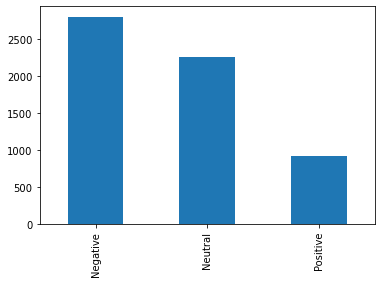

In [60]:
trumpTweetsDf['sentiment'].value_counts().plot(kind='bar')

### Positive Sentiment Tweet Analysis

In [81]:
trumpTweetsDf_pos = trumpTweetsDf[trumpTweetsDf['sentiment'] == 'Positive' ]

In [85]:
message_text = [word for one_message in trumpTweetsDf['tokenized_words'] for word in one_message]
hundred_most_common_words = Counter(message_text).most_common(100)

In [86]:
hundred_most_common_words

[('trump', 6567),
 ('donald', 3480),
 ('’', 1891),
 ('president', 734),
 ('jew', 700),
 ('say', 584),
 ('“', 540),
 ('like', 529),
 ('u', 524),
 ('american', 505),
 ('”', 504),
 ('get', 475),
 ('truth', 467),
 ('via', 460),
 ('republican', 457),
 ('election', 457),
 ('social', 452),
 ('people', 417),
 ('former', 417),
 ('6', 388),
 ('committee', 362),
 ('biden', 349),
 ('act', 326),
 ('israel', 325),
 ('j', 322),
 ('‘', 310),
 ('would', 308),
 ('jan', 300),
 ('one', 284),
 ('new', 266),
 ('company', 266),
 ('vote', 262),
 ('know', 244),
 ('medium', 242),
 ('america', 242),
 ('want', 235),
 ('time', 226),
 ('country', 210),
 ('jr', 209),
 ('together', 208),
 ('2020', 207),
 ('gop', 205),
 ('state', 202),
 ('year', 201),
 ('could', 198),
 ('wanted', 190),
 ('late', 189),
 ('day', 186),
 ('need', 185),
 ('democrat', 185),
 ('lie', 185),
 ('see', 183),
 ('make', 181),
 ('eric', 176),
 ('report', 175),
 ('said', 174),
 ('party', 172),
 ('even', 172),
 ('political', 172),
 ('house', 171),
 (

In [96]:
#Initializing Required Variables
base_df = trumpTweetsDf_pos.copy()
top_att = ['Jew', 'truth', 'israel', 'attack', 'law', 'cohen', 'smartnews', 'evangelicals','election', 'maga', 'vote', '2020', '2024']
prez = 'trump'
lift_table = pd.DataFrame(columns = top_att)
base_df["word_unique"] = base_df["tokenized_words"].apply(lambda x: sorted(set(x)))

In [90]:
def lift_analysis(a, b, message_tokens):
    freq_a = 0
    freq_b = 0
    freq_a_b = 0
    n = len(message_tokens)
    for i in message_tokens:
        if any(i in a for i in i):
            freq_a += 1
        if b in i:
            freq_b += 1
        if any(i in a for i in i) and b in i:
            freq_a_b += 1
    if freq_a == 0:
        return (float(n)*freq_a_b)/(freq_b)
    elif freq_b == 0:
        return (float(n)*freq_a_b)/(freq_a)
    else:
        return (float(n)*freq_a_b)/(freq_a*freq_b)

In [97]:
prez_att_lift =pd.DataFrame(columns=['Trump','Topic','lift'])
i=0
for att in top_att:
    temp_lift=lift_analysis(prez.lower(), str(att).lower(), base_df.word_unique)
    prez_att_lift.loc[i]=[prez.lower(), str(att).lower(),temp_lift]
    i=i+1

In [98]:
df_temp = prez_att_lift.sort_values('lift',ascending = False)
df_temp

,Trump,Topic,lift
2,trump,israel,1.066820
3,trump,attack,1.066820
5,trump,cohen,1.066820
6,trump,smartnews,1.066820
7,trump,evangelicals,1.066820
9,trump,maga,1.066820
11,trump,2020,1.066820
12,trump,2024,1.066820
1,trump,truth,1.058614
0,trump,jew,1.054120


### Negetive Sentiment Tweet Analysis

In [99]:
base_df = trumpTweetsDf_neg.copy()
top_att = ['Jew', 'truth', 'israel', 'attack', 'law', 'cohen', 'smartnews', 'evangelicals','election', 'maga', 'vote', '2020', '2024']
prez = 'trump'
lift_table = pd.DataFrame(columns = top_att)
base_df["word_unique"] = base_df["tokenized_words"].apply(lambda x: sorted(set(x)))

In [100]:
prez_att_lift =pd.DataFrame(columns=['Trump','Topic','lift'])
i=0
for att in top_att:
    temp_lift=lift_analysis(prez.lower(), str(att).lower(), base_df.word_unique)
    prez_att_lift.loc[i]=[prez.lower(), str(att).lower(),temp_lift]
    i=i+1

In [101]:
df_temp = prez_att_lift.sort_values('lift',ascending = False)
df_temp

,Trump,Topic,lift
5,trump,cohen,1.096951
3,trump,attack,1.088313
11,trump,2020,1.087412
2,trump,israel,1.086504
0,trump,jew,1.083695
7,trump,evangelicals,1.072574
12,trump,2024,1.065609
4,trump,law,1.059555
6,trump,smartnews,1.053933
9,trump,maga,1.012570


### Hashtag Analysis of Positive and Negetive Sentiment Tweets

In [107]:
trumpTweetsDf_neg['hashtag'] = trumpTweetsDf_neg['post'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x)) #Extract hashtags

/var/folders/d7/6rnrvvkn0gx0fk0d668z6ydr0000gn/T/ipykernel_81898/3272242468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trumpTweetsDf_neg['hashtag'] = trumpTweetsDf_neg['post'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x)) #Extract hashtags


In [109]:
trumpTweetsDf_neg

,post,clean,words,hashtag,entities,Tweet_Tokens,tokenized_words,vader_score,sentiment,compound_score
0,He’s just disgusting \n,He s just disgusting,"0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\n0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\n0 he s just disgusting he s done diddleysquat for anyone other than himself and his cronies the jews we ll take advice from knowledgeable people not from this soon to be convict why is donald trump harassing jews because he loves the attention name clean dtype object\nname: words, dtype: object",[],,he’s just disgusting,"[’, disgusting]","(Negative, -0.5267)",Negative,-0.5267
1,"1/Why are Dems waving the flag of surrender on the economy?\n\n""Yes world-wide inflation is high bc Covid &amp; Putin's war but Biden increased job growth 500%, pulled us out of Trump's deep recession, rescued millions of kids from poverty""\n\nGOP plan? Raise cost$",Why are Dems waving the flag of surrender on the economy Yes world wide inflation is high bc Covid Putin s war but Biden increased job growth pulled us out of Trump s deep recession rescued millions of kids from poverty GOP plan Raise cost,,[],,1why are dems waving the flag of surrender on the economy yes worldwide inflation is high bc covid amp putins war but biden increased job growth 500 pulled us out of trumps deep recession rescued millions of kids from poverty gop plan raise cost,"[1why, dems, waving, flag, surrender, economy, yes, worldwide, inflation, high, bc, covid, putin, war, biden, increased, job, growth, 500, pulled, u, trump, deep, recession, rescued, million, kid, poverty, gop, plan, raise, cost]","(Negative, -0.2023)",Negative,-0.2023
3,"I don’t see any attack on his comment, but I see an attack from this media against Trump making this information sensationalist, as a Jewish I only see a huge truth in his words, Washington Post mostly publishing fake news…",I don t see any attack on his comment but I see an attack from this media against Trump making this information sensationalist as a Jewish I only see a huge truth in his words Washington Post mostly publishing fake news,,[],,i don’t see any attack on his comment but i see an attack from this media against trump making this information sensationalist as a jewish i only see a huge truth in his words washington post mostly publishing fake news…,"[’, see, attack, comment, see, attack, medium, trump, making, information, sensationalist, jewish, see, huge, truth, word, washington, post, mostly, publishing, fake, news…]","(Negative, -0.6908)",Negative,-0.6908
6,#IRI #Politics #Trump\nNEW #Jan6 Footage Will SHOCK YOU \n#Jan6thCommittee \n,NEW Footage Will SHOCK YOU,,"[#IRI, #Politics, #Trump, #Jan6, #Jan6thCommittee]",,iri politics trump new jan6 footage will shock you jan6thcommittee,"[iri, politics, trump, new, jan6, footage, shock, jan6thcommittee]","(Negative, -0.3818)",Negative,-0.3818
7,"Really need to take this and Trump's comments together. Antisemitism doesn't rise out of nothing. It's pushed. And they speak to two very different audiences. If those two audiences both start to engage in antisemitic violence and harassment, it can get very, very bad.",Really need to take this and Trump s comments together Antisemitism doesn t rise out of nothing It s pushed And they speak to two very different audiences If those two audiences both start to engage in antisemitic violence and harassment it can get very very bad,,[],,really need to take this and trumps comments together antisemitism doesnt rise out of nothing its pushed and they speak to two very 

In [111]:
hashtags_list_neg=[]
trumpTweetsDf_neg.hashtag.apply(lambda x: hashtags_list_neg.extend(x))
unique_hashtags=list(set(hashtags_list_neg))
len(unique_hashtags)

472

<AxesSubplot:>

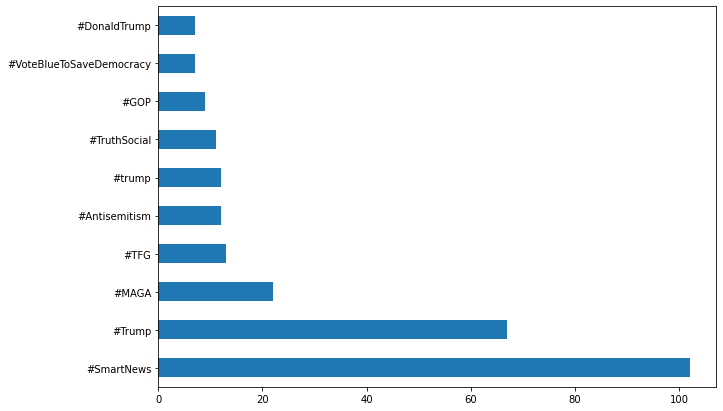

In [116]:
pd.Series(hashtags_list_neg).value_counts()[:10].plot(kind="barh")

In [114]:
hashtags_list_pos=[]
trumpTweetsDf_pos.hashtag.apply(lambda x: hashtags_list_pos.extend(x))
unique_hashtags=list(set(hashtags_list_pos))
len(unique_hashtags)

157

<AxesSubplot:>

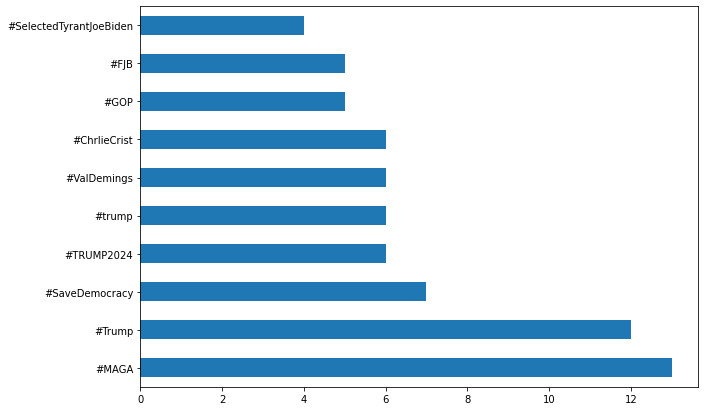

In [117]:
pd.Series(hashtags_list_pos).value_counts()[:10].plot(kind="barh")